# DS105 L8 P6 Hands on Helper

This example is similar to the hands-on assignment but works with a different dataset.

For the hands-on assignment, be sure you're working with the heart attack dataset.

In [1]:
install.packages("vembedr")
library("vembedr")
embed_vimeo("645345499")

Installing package into 'C:/Users/marga/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependency 'assertthat'




package 'assertthat' successfully unpacked and MD5 sums checked
package 'vembedr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marga\AppData\Local\Temp\RtmpIv8YV4\downloaded_packages


Warning message:
"package 'vembedr' was built under R version 4.1.3"


Shiny tags cannot be represented in plain text (need html)

https://vimeo.com/645345499

In [2]:
install.packages("mvnormtest")
install.packages("car")
install.packages("plyr")
install.packages("ggplot2")

Installing package into 'C:/Users/marga/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'mvnormtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marga\AppData\Local\Temp\RtmpIv8YV4\downloaded_packages


Installing package into 'C:/Users/marga/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'car' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marga\AppData\Local\Temp\RtmpIv8YV4\downloaded_packages


Installing package into 'C:/Users/marga/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marga\AppData\Local\Temp\RtmpIv8YV4\downloaded_packages


Installing package into 'C:/Users/marga/Documents/R/win-library/4.1'
(as 'lib' is unspecified)

also installing the dependencies 'rlang', 'scales', 'withr'




package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\marga\Documents\R\win-library\4.1\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\marga\Documents\R\win-library\4.1\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'scales' successfully unpacked and MD5 sums checked
package 'withr' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marga\AppData\Local\Temp\RtmpIv8YV4\downloaded_packages


In [3]:
library("mvnormtest")
library("car")
library("plyr")
library("ggplot2")

Warning message:
"package 'car' was built under R version 4.1.3"
Loading required package: carData

Warning message:
"package 'plyr' was built under R version 4.1.3"
Warning message:
"package 'ggplot2' was built under R version 4.1.3"


ERROR: Error: package or namespace load failed for 'ggplot2' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 1.0.6 is already loaded, but >= 1.1.0 is required


In [5]:
df <- read.csv("../Data/hockey1.csv")

In [6]:
head(df)

,ID,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim
,<dbl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,20120302213,2012030221,3,away,FALSE,OT,John Tortorella,2,35,44,8
2,20120302216,2012030221,6,home,TRUE,OT,Claude Julien,3,48,51,6
3,20120302223,2012030222,3,away,FALSE,REG,John Tortorella,2,37,33,11
4,20120302226,2012030222,6,home,TRUE,REG,Claude Julien,5,32,36,19
5,20120302236,2012030223,6,away,TRUE,REG,Claude Julien,2,34,28,6
6,20120302233,2012030223,3,home,FALSE,REG,John Tortorella,1,24,37,2


### independent variable is home or away
### dependent variables are goals and hits

In [7]:
df$goals <- as.numeric(df$goals)
df$hits <- as.numeric(df$hits)

In [8]:
df$HoAFactor <- as.factor(df$HoA)

In [9]:
head(df)

,ID,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,HoAFactor
,<dbl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<fct>
1,20120302213,2012030221,3,away,FALSE,OT,John Tortorella,2,35,44,8,away
2,20120302216,2012030221,6,home,TRUE,OT,Claude Julien,3,48,51,6,home
3,20120302223,2012030222,3,away,FALSE,REG,John Tortorella,2,37,33,11,away
4,20120302226,2012030222,6,home,TRUE,REG,Claude Julien,5,32,36,19,home
5,20120302236,2012030223,6,away,TRUE,REG,Claude Julien,2,34,28,6,away
6,20120302233,2012030223,3,home,FALSE,REG,John Tortorella,1,24,37,2,home


In [10]:
#feature selection
keeps <- c("HoAFactor", "goals", "hits")
df <- df[keeps]

In [11]:
#assumption sample size
count(df, "HoAFactor") #assumption NOT violated

HoAFactor,freq
<fct>,<int>
away,7441
home,7441


In [12]:
#feature selection for shapiro test
keeps1 <- c("goals", "hits")
df1 <- df[keeps1]

In [14]:
#multivariate normality
# NOTE: we must limit this to top 5000 rows when you have an extremely large dataset.
mshapiro.test(t(df1))  #violates this assumption, p < .05


	Shapiro-Wilk normality test

data:  Z
W = 0.97663, p-value < 2.2e-16


In [15]:
#Homogeneity of Variance
leveneTest(goals ~ HoAFactor, data=df) # Violates
leveneTest(hits ~ HoAFactor, data=df)  # Violates

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,12.58116,0.0003908537
,14880,NA,NA


,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,1,12.67251,0.0003722286
,14880,NA,NA


In [16]:
#Absence of Multicollinearity
cor.test(df$goals, df$hits, method="pearson", use="complete.obs") #below .7, no strong multicollinearity


	Pearson's product-moment correlation

data:  df$goals and df$hits
t = -10.449, df = 14880, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.10127394 -0.06937475
sample estimates:
        cor 
-0.08534622 


In [17]:
#MANOVA
#
MANOVA <- manova(cbind(goals, hits) ~ HoAFactor, data = df)

In [18]:
summary(MANOVA)

             Df   Pillai approx F num Df den Df    Pr(>F)    
HoAFactor     1 0.014553   109.87      2  14879 < 2.2e-16 ***
Residuals 14880                                              
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [19]:
summary.aov(MANOVA, test = "wilks") 

 Response goals :
               Df Sum Sq Mean Sq F value    Pr(>F)    
HoAFactor       1    271 271.206  104.02 < 2.2e-16 ***
Residuals   14880  38796   2.607                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

 Response hits :
               Df  Sum Sq Mean Sq F value    Pr(>F)    
HoAFactor       1    7393  7392.8  95.392 < 2.2e-16 ***
Residuals   14880 1153181    77.5                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [ ]:
#There is a significant difference in goals and hits in relation to having home ice.

In [20]:
head(df)

,HoAFactor,goals,hits
,<fct>,<dbl>,<dbl>
1,away,2,44
2,home,3,51
3,away,2,33
4,home,5,36
5,away,2,28
6,home,1,37


In [23]:
aggregate(goals ~ HoAFactor, df, mean)
aggregate(goals ~ HoAFactor, df, sum)

HoAFactor,goals
<fct>,<dbl>
away,2.585405
home,2.855396


HoAFactor,goals
<fct>,<dbl>
away,19238
home,21247


In [22]:
aggregate(hits ~ HoAFactor, df, mean)
aggregate(hits ~ HoAFactor, df, sum)

HoAFactor,hits
<fct>,<dbl>
away,23.11732
home,24.52695


HoAFactor,hits
<fct>,<dbl>
away,172016
home,182505


In [24]:
ggplot(df, aes(x=HoAFactor, y=goals)) + geom_bar(stat="identity")

ERROR: Error in ggplot(df, aes(x = HoAFactor, y = goals)): could not find function "ggplot"


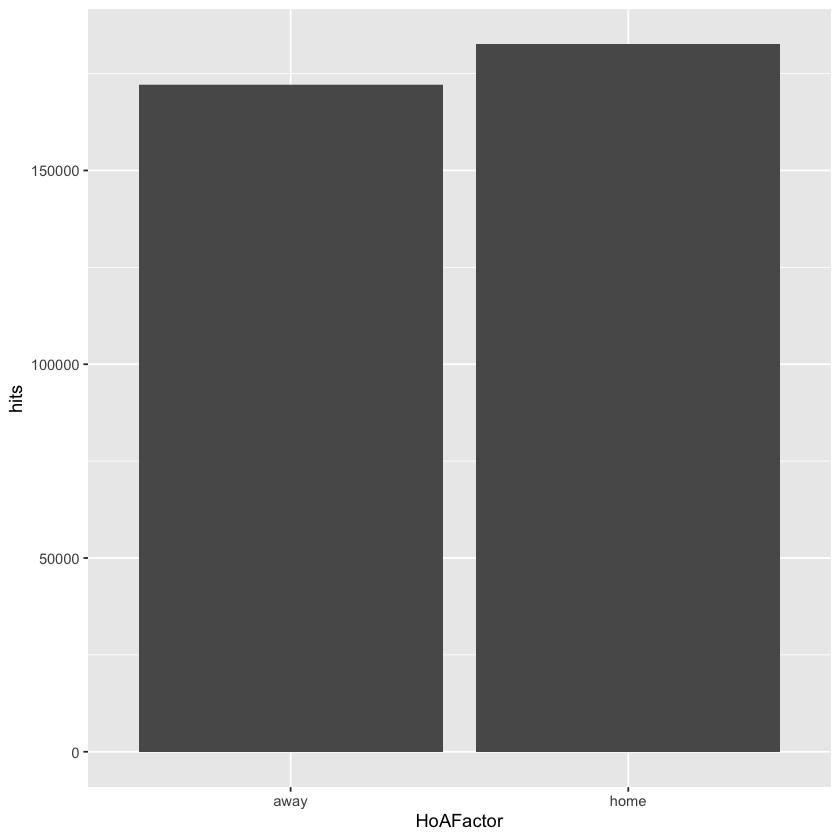

In [21]:
ggplot(df, aes(x=HoAFactor, y=hits)) + geom_bar(stat="identity")